<a href="https://colab.research.google.com/github/roshank1605A04/Fraud-Detection-in-Online-Transactions/blob/master/Fraud_detection_in_financial_payment_services.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [58]:
# importing the dataset using dask

%time data = pd.read_csv('paymentfraud.csv')

print(data.shape)

CPU times: total: 188 ms
Wall time: 674 ms
(100000, 11)


In [59]:
data.sample(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
30557,8,CASH_OUT,2502.24,C957285334,22434.57,19923.00,C831467165,8472095.07,8605094.93,1,0
62889,9,PAYMENT,6891.78,C1342100598,11278.03,4378.92,M1928117337,0.00,0.00,1,0
41594,9,CASH_OUT,7726.46,C562853570,30271.49,22535.24,C430297016,379918.61,959906.70,1,0
1135,1,PAYMENT,3272.65,C439232821,72531.09,69258.44,M1933328958,0.00,0.00,0,0
69032,9,CASH_IN,5231.28,C370251456,8966.55,3733.12,C388527192,1675611.06,2088145.36,1,0
45566,9,CASH_OUT,4247.43,C1368163464,98379.59,94132.16,C168639687,0.00,316468.08,0,0
28772,8,PAYMENT,5972.47,C1597937945,32934.80,26957.93,M1398900935,0.00,0.00,1,0
71714,9,CASH_OUT,7467.57,C1718912899,75527.76,68060.20,C649126198,59902.88,128827.17,0,0
2662,1,CASH_IN,3824.99,C810353241,63078.07,59253.08,C884457408,375432.34,84916.82,0,0
69987,9,CASH_OUT,2718.74,C676871827,43732.98,41014.25,C1988708960,152211.96,133774.24,0,0


In [60]:
# getting the information related to data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            100000 non-null  int64  
 1   type            100000 non-null  object 
 2   amount          100000 non-null  float64
 3   nameOrig        100000 non-null  object 
 4   oldbalanceOrg   100000 non-null  float64
 5   newbalanceOrig  100000 non-null  float64
 6   nameDest        100000 non-null  object 
 7   oldbalanceDest  100000 non-null  float64
 8   newbalanceDest  100000 non-null  float64
 9   isFraud         100000 non-null  int64  
 10  isFlaggedFraud  100000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.4+ MB


In [61]:
#describing the data

data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,1.000000e+05,100000.000000,100000.0
mean,8.499640,5003.607174,49995.802898,44992.192246,8.805096e+05,1.184082e+06,0.402950,0.0
std,1.825545,2890.889481,28878.517288,29011.250604,2.402306e+06,2.802521e+06,0.490493,0.0
min,1.000000,1.020000,10.090000,-9850.060000,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,2489.247500,24877.282500,19975.860000,0.000000e+00,0.000000e+00,0.000000,0.0
50%,9.000000,5013.590000,50090.300000,45089.680000,2.083943e+04,4.990918e+04,0.000000,0.0
75%,10.000000,7508.547500,74930.285000,69981.657500,5.882724e+05,1.058186e+06,1.000000,0.0
max,10.000000,9999.990000,99999.470000,99932.270000,3.400000e+07,3.890000e+07,1.000000,0.0


In [62]:
#checking how many frauds are there

data['isFraud'].value_counts()

isFraud
0    59705
1    40295
Name: count, dtype: int64

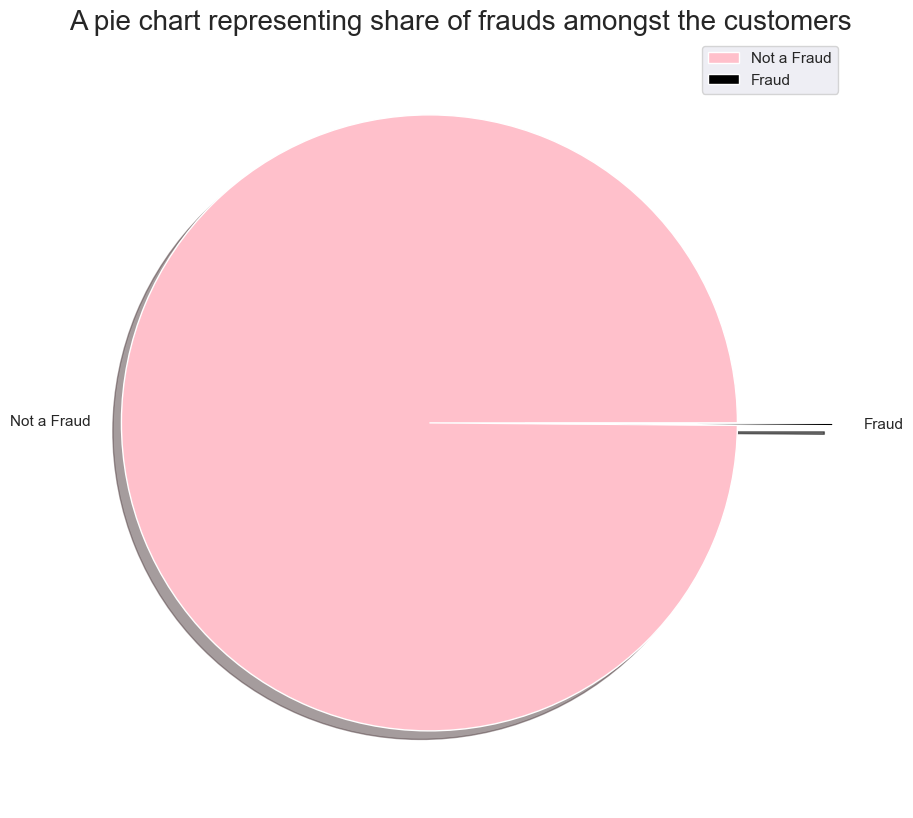

In [63]:
labels = ['Not a Fraud', 'Fraud']
colors = ['pink', 'black']
size = [6354407, 8213]
explode = [0.1, 0.21]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True)
plt.axis('off')
plt.title('A pie chart representing share of frauds amongst the customers',fontsize = 20)
plt.legend()
plt.show()

In [64]:
data['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    100000
Name: count, dtype: int64

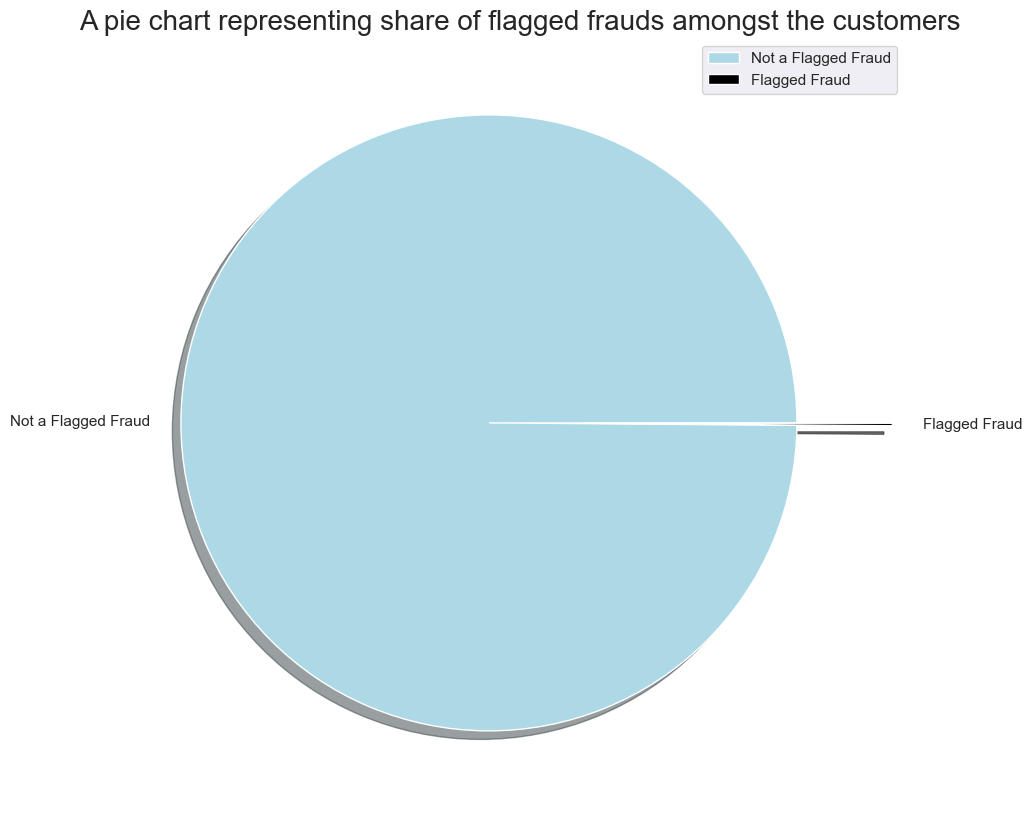

In [65]:
labels = ['Not a Flagged Fraud', 'Flagged Fraud']
colors = ['lightblue', 'black']
size = [6354407, 8213]
explode = [0.1, 0.21]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True)
plt.axis('off')
plt.title('A pie chart representing share of flagged frauds amongst the customers',fontsize = 20)
plt.legend()
plt.show()

In [66]:
data['type'].value_counts()

type
PAYMENT     39512
CASH_OUT    30718
CASH_IN     20185
TRANSFER     8597
DEBIT         988
Name: count, dtype: int64

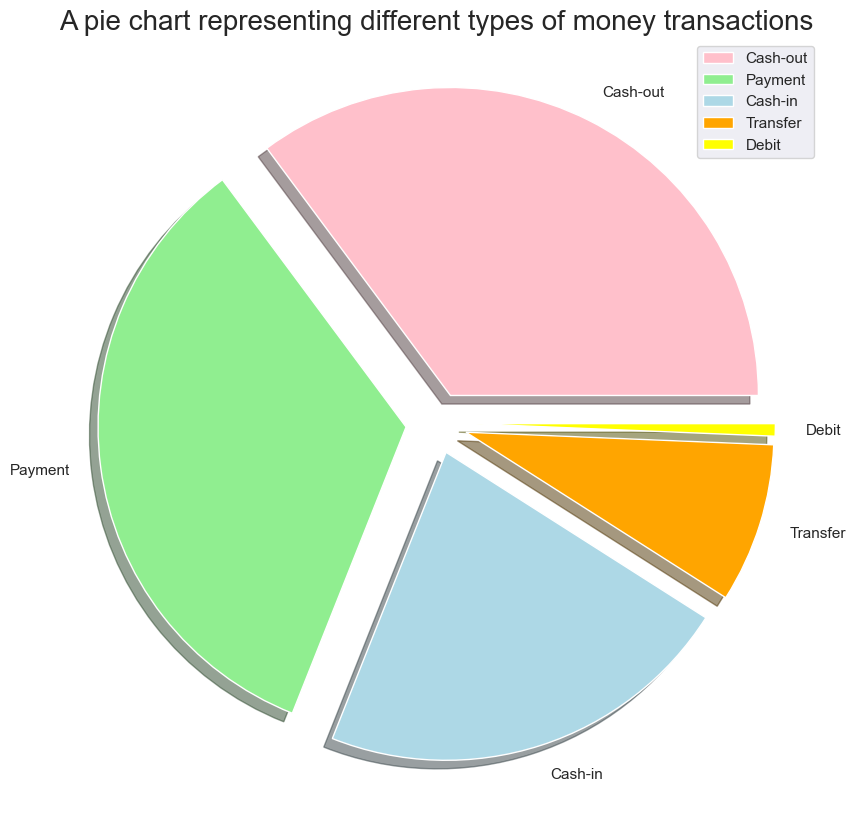

In [67]:
labels = ['Cash-out', 'Payment', 'Cash-in', 'Transfer', 'Debit']
size = [2237500, 2151495, 1399284, 532909, 41432]
colors = ['pink', 'lightgreen', 'lightblue', 'orange', 'yellow']
explode = [0.1, 0.1, 0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True)
plt.title('A pie chart representing different types of money transactions', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [68]:
# checking the different types of steps involved in transactions

x = data['step'].value_counts().nunique()

# printing the result
print("The no. of different steps involved in transactions are :", x)

The no. of different steps involved in transactions are : 10


C:\Users\karna\AppData\Local\Temp\ipykernel_22396\917377088.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.step, fit = norm, kde = False)


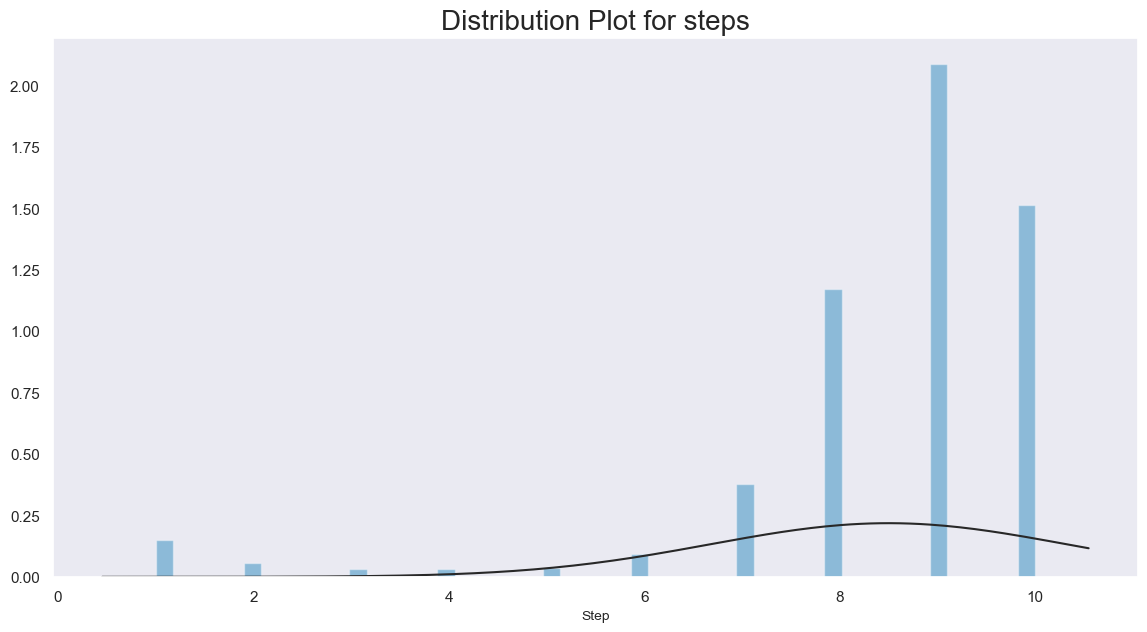

In [69]:
# setting thesze of the figure
plt.rcParams['figure.figsize'] =(14, 7)

# importing norm
from scipy.stats import norm

sns.distplot(data.step, fit = norm, kde = False)
plt.title('Distribution Plot for steps', fontsize = 20)
plt.xlabel('Step', fontsize = 10)
plt.show()

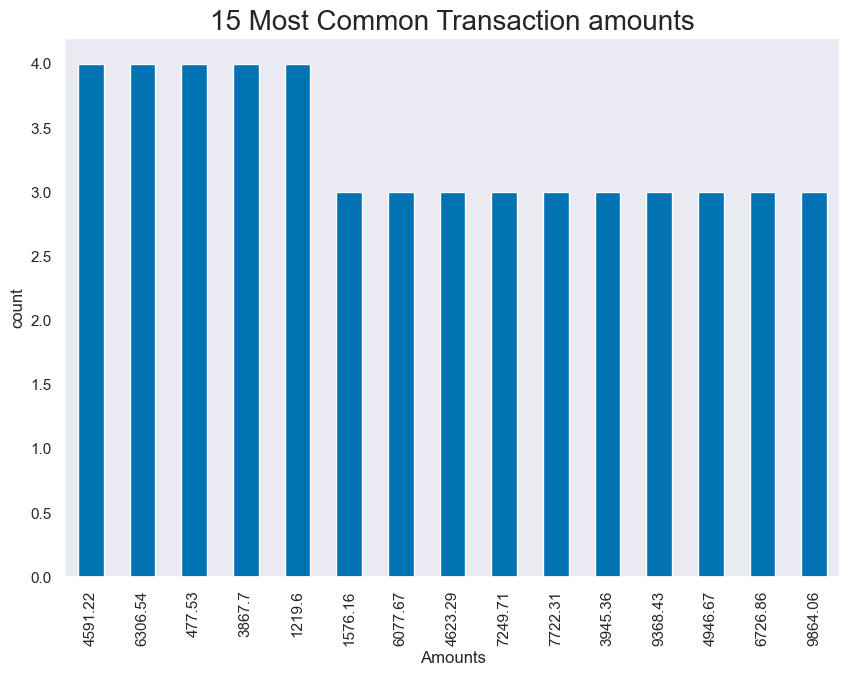

In [70]:
# checking the different values of amounts transationed

plt.rcParams['figure.figsize'] = (10, 7)

data['amount'].value_counts().head(15).plot.bar()
plt.title('15 Most Common Transaction amounts', fontsize = 20)
plt.xlabel('Amounts')
plt.ylabel('count')
plt.show()

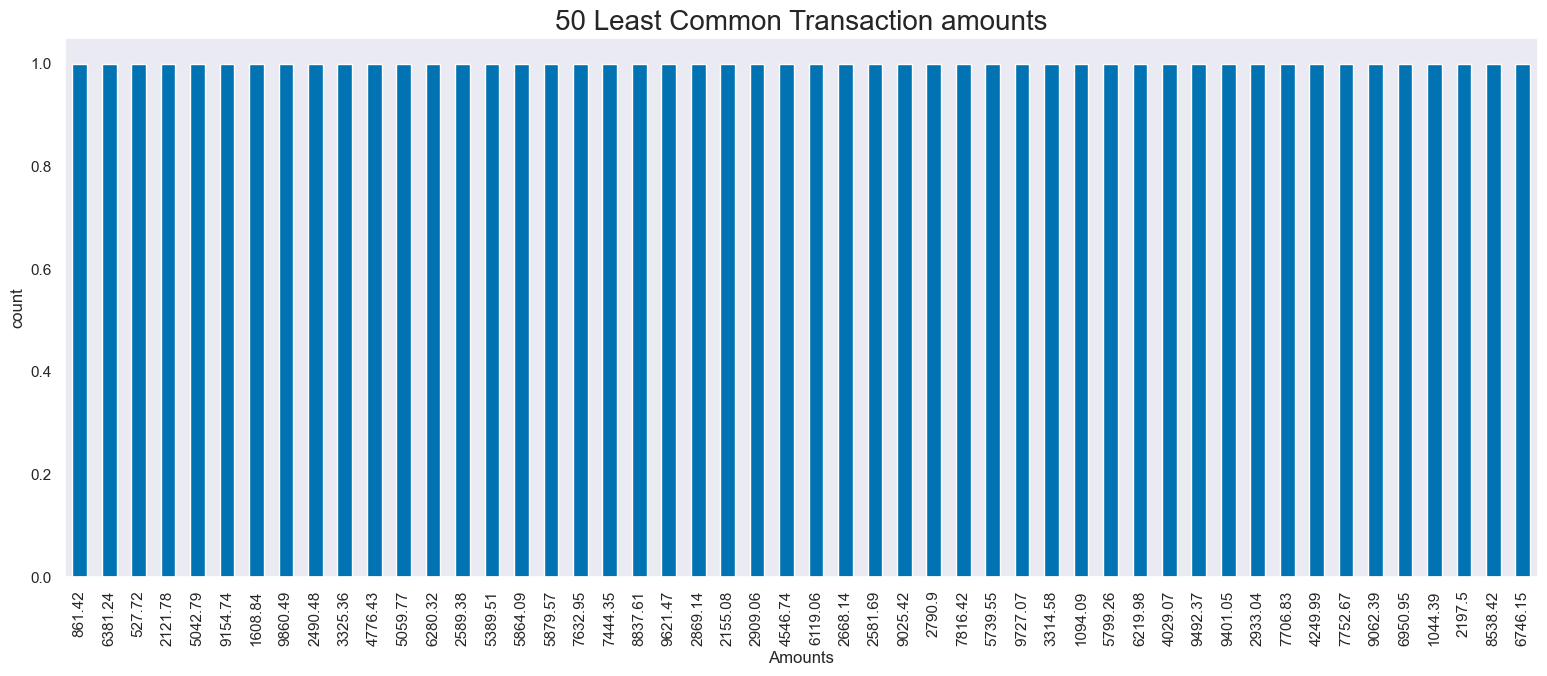

In [71]:
# checking the different values of amounts transationed

plt.rcParams['figure.figsize'] = (19, 7)

data['amount'].value_counts().tail(50).plot.bar()
plt.title('50 Least Common Transaction amounts', fontsize = 20)
plt.xlabel('Amounts')
plt.ylabel('count')
plt.show()

C:\Users\karna\AppData\Local\Temp\ipykernel_22396\208744203.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data.amount)
C:\Users\karna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


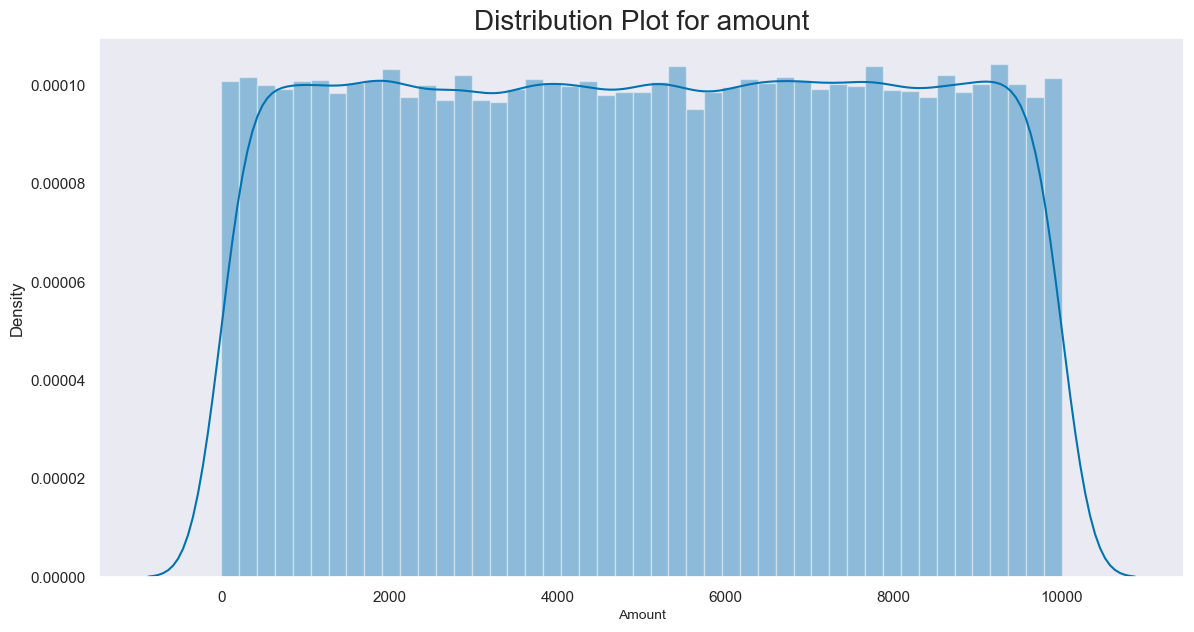

In [72]:
# setting thesze of the figure
plt.rcParams['figure.figsize'] =(14, 7)

# setting the style in seaborn
sns.set(style = 'dark', palette = 'colorblind')

#plotting a dist plot
ax = sns.distplot(data.amount)
ax.set_title(label = 'Distribution Plot for amount', fontsize = 20)
ax.set_xlabel(xlabel = 'Amount', fontsize = 10)
plt.show()

In [73]:
# finding  out the types of fraudulent transaction types out of all the transaction modes.

print('The Types of fraudulent transactions are {}'.format(list(data.loc[data.isFraud == 1].type.drop_duplicates().values)) )

The Types of fraudulent transactions are ['CASH_OUT', 'PAYMENT', 'DEBIT', 'TRANSFER', 'CASH_IN']


In [74]:
# figuring out the fraud transfer and fraud cash outs
dfFraudTransfer = data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')]
dfFraudCashout = data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')]


#printing the number of fraudulent transfers ans cash outs
print ('The number of fraudulent TRANSFERs = {}'.format(len(dfFraudTransfer)))
print ('The number of fraudulent CASH_OUTs = {}'.format(len(dfFraudCashout)))

The number of fraudulent TRANSFERs = 3405
The number of fraudulent CASH_OUTs = 12336


In [75]:
# finding out the minimum and maximum transaction from Transfer and cash out transaction mode when it is set to be Fraud

print("Transfer Transaction")
print("Minimum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')].amount.min())
print("Maximum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')].amount.max())

print("\nCASH_OUT Transaction")
print("Minimum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')].amount.min())
print("Maximum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')].amount.max())

Transfer Transaction
Minimum Transaction : 3.63
Maximum Transaction : 9998.25

CASH_OUT Transaction
Minimum Transaction : 1.02
Maximum Transaction : 9999.99


In [76]:
#finding out the transactions which are flagged to be fraud

print("The Type of Transaction in which IsFlagged is set :", data.loc[data.isFlaggedFraud == 1].type.drop_duplicates().values)


The Type of Transaction in which IsFlagged is set : []


In [77]:
# figuringing out the no. of flagged fraudulent transactions
FlaggedFraud = data.loc[(data.isFlaggedFraud == 1) & (data.type == 'TRANSFER')]
print("The no. of Flagged Fraudulent Transactions :", len(FlaggedFraud))

# printing the minimum and maximum transactions done when FlaggedFraud is set
# the Transaction mode being Transfer
print("Minimum Transaction :", data.loc[data.isFlaggedFraud == 1].amount.min())
print("Maximum Transaction :", data.loc[data.isFlaggedFraud == 1].amount.max())


The no. of Flagged Fraudulent Transactions : 0
Minimum Transaction : nan
Maximum Transaction : nan


In [78]:
# Figuring out the transactions where old balance dest. and new balance dest. are 0 being FlaggedFraud

x = data.loc[(data.isFlaggedFraud == 0) & (data.oldbalanceDest == 0) & (data.newbalanceDest == 0)]
print("Figuring out the no. of transactions where old balance dest. and new balance dest. are 0 being FlaggedFraud :", x)

Figuring out the no. of transactions where old balance dest. and new balance dest. are 0 being FlaggedFraud :        step      type   amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0         1   PAYMENT  8454.40  C1231006815       32107.88        23653.48   
1         1   PAYMENT  1742.91  C1666544295       70278.19        68535.28   
2         1  TRANSFER  5827.77  C1305486145       21806.90        15979.13   
4         1   PAYMENT  2666.88  C2048537720       76644.30        73977.41   
5         1   PAYMENT    85.69    C90045638       65428.65        65342.95   
...     ...       ...      ...          ...            ...             ...   
99993    10   PAYMENT  5486.30   C269657166       99927.57        94441.27   
99994    10   PAYMENT  9679.20   C559473129        6987.07        -2692.13   
99995    10   PAYMENT  5557.50  C1410794718       98946.43        93388.93   
99996    10   PAYMENT   929.13   C744303677       99206.33        98277.20   
99999    10   PAYMENT  7957.12  

**Dataset where only Transfer Transactions are mentioned**

In [79]:
# defining a dataset containing only transfer type of transactions

dataTransfer = data.loc[data['type'] == 'TRANSFER']

dataTransfer = pd.DataFrame(dataTransfer)

dataTransfer.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,5827.77,C1305486145,21806.90,15979.13,C553264065,0.00,0.00,0,0
19,1,TRANSFER,2010.92,C1670993182,2756.07,747.21,C1100439041,22425.00,0.00,1,0
24,1,TRANSFER,2032.46,C1984094095,5549.60,3523.57,C932583850,6267.00,2719172.89,1,0
58,1,TRANSFER,6678.35,C1976401987,27790.06,21113.89,C1937962514,517.00,8383.29,1,0
78,1,TRANSFER,6227.72,C283039401,79164.12,72936.40,C1330106945,57901.66,24044.18,0,0
79,1,TRANSFER,3198.73,C207471778,36496.73,33297.17,C1761291320,94900.00,22233.65,1,0
80,1,TRANSFER,5781.12,C1243171897,29505.87,23724.75,C783286238,24672.00,0.00,0,0
81,1,TRANSFER,5706.26,C1376151044,87001.35,81290.03,C1749186397,103772.00,277515.05,1,0
82,1,TRANSFER,3170.68,C873175411,17862.98,14692.29,C766572210,354678.92,0.00,0,0
83,1,TRANSFER,1965.92,C1443967876,24218.41,22252.49,C392292416,348512.00,3420103.09,0,0


**Minimum Original old Balance for Flagged Frauds**

In [80]:




# frauds having same old and new balance
# sorted by old orignal balance to check original old balance for flagged frauds

# this table shows flagged frauds with minimum original old balance


dataTransfer.loc[(dataTransfer.isFlaggedFraud == 1) & (dataTransfer.oldbalanceOrg == dataTransfer.newbalanceOrig)].sort_values(by = 'oldbalanceOrg').head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


**Maximum Original Balance for Flagged Frauds**

In [81]:
# frauds having same old and new balance
# sorted by old orignal balance to check original old balance for flagged frauds

# this table shows flagged frauds with maximum original old balance


dataTransfer.loc[(dataTransfer.isFlaggedFraud == 1) & (dataTransfer.oldbalanceOrg == dataTransfer.newbalanceOrig)].sort_values(by = 'oldbalanceOrg').tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


**Minimum Original Old Balace for non-Flagged Frauds**

In [82]:
dataTransfer.loc[(dataTransfer['isFlaggedFraud'] == 0) & (dataTransfer.oldbalanceDest == dataTransfer.newbalanceDest)].sort_values(by = 'oldbalanceOrg').head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
34168,8,TRANSFER,5302.67,C1683174795,2159.37,-3143.30,C427998326,0.0,0.0,0,0
43289,9,TRANSFER,9944.54,C122680836,3925.58,-6018.97,C1787868648,15700000.0,15700000.0,0,0
4667,4,TRANSFER,4237.32,C540962910,5193.59,956.26,C2127862399,0.0,0.0,0,0
1869,1,TRANSFER,9643.02,C669700766,7982.03,-1664.81,C1384210339,0.0,0.0,1,0
94843,10,TRANSFER,240.99,C880791693,8769.73,8527.10,C1587524535,0.0,0.0,1,0
12467,7,TRANSFER,3542.20,C1023505879,10493.36,6959.37,C847761155,0.0,0.0,1,0
67183,9,TRANSFER,5841.83,C1347886326,11333.02,5492.81,C1383702768,0.0,0.0,1,0
5746,6,TRANSFER,7101.43,C864622150,11670.43,4569.00,C41792607,0.0,0.0,0,0
55995,9,TRANSFER,2363.47,C1745032030,12857.04,10493.57,C717490079,0.0,0.0,0,0
23639,8,TRANSFER,9977.16,C1654013872,13244.68,3260.52,C588565911,0.0,0.0,1,0


**Maximum Original Old Balance for Non-Flagged Frauds**

In [83]:
dataTransfer.loc[(dataTransfer['isFlaggedFraud'] == 0) & (dataTransfer.oldbalanceDest == dataTransfer.newbalanceDest)].sort_values(by = 'oldbalanceOrg').tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3683,2,TRANSFER,2994.96,C1375503918,88583.16,85588.20,C234430897,0.0,0.0,0,0
56508,9,TRANSFER,4491.01,C420186505,90820.86,86333.55,C467710030,0.0,0.0,1,0
12214,7,TRANSFER,9748.15,C786114805,95052.92,85304.77,C1666314150,0.0,0.0,0,0
4857,5,TRANSFER,9151.35,C1409933277,95682.31,86530.97,C162114152,0.0,0.0,0,0
4693,4,TRANSFER,3693.36,C17222024,95946.77,92253.40,C410033330,0.0,0.0,0,0
13105,7,TRANSFER,1361.81,C1397283620,96243.69,94883.67,C1002031672,0.0,0.0,1,0
17664,8,TRANSFER,5711.27,C1282310120,96609.61,90904.11,C382431057,0.0,0.0,1,0
14548,8,TRANSFER,1302.62,C1279599757,97057.49,95754.86,C128870695,14500000.0,14500000.0,0,0
20538,8,TRANSFER,3551.08,C1295927235,98397.10,94846.62,C1076496284,0.0,0.0,1,0
31240,8,TRANSFER,3641.64,C757328809,99589.72,95948.08,C1223591088,0.0,0.0,0,0


In [84]:
# finding out the minimum and maximum amount for oldbalance original where oldbalance and newbalance for dest is same.

dataFlagged = data.loc[data.isFlaggedFraud == 1]

print('Minimum Balance of oldBalanceOrig for FlaggedFraud and Transfer mode :', dataFlagged.oldbalanceOrg.min())
print('Maximum Balance of oldbalanceOrig for FlaggedFraud and Transfer mode :', dataFlagged.oldbalanceOrg.max())


Minimum Balance of oldBalanceOrig for FlaggedFraud and Transfer mode : nan
Maximum Balance of oldbalanceOrig for FlaggedFraud and Transfer mode : nan


In [85]:
# Finding the maximum and minimum balance in original balance when newbalance original and oldbalance original are equal

print('Minimum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode:',
      data[(data.type == 'TRANSFER') & (data.isFlaggedFraud == 0) & (data.oldbalanceOrg == data.newbalanceOrig)].oldbalanceOrg.min())
print('Maximum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode:',
      data[(data.type == 'TRANSFER') & (data.isFlaggedFraud == 0) & (data.oldbalanceOrg == data.newbalanceOrig)].oldbalanceOrg.max())

# Can isFlaggedFraud be set based on seeing a customer transacting more than once? Note that duplicate customer names don't exist within 
# transactions where isFlaggedFraud is set, but duplicate customer names exist within transactions where isFlaggedFraud is not set. It turns 
# out that originators of transactions that have isFlaggedFraud set have transacted only once. Very few destination accounts of transactions 
# that have isFlaggedFraud set have transacted more than once.

Minimum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode: nan
Maximum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode: nan


In [86]:
print('Minimum Balance of oldbalanceOrig for  FlaggedFraud and Transfer mode:',
      data[(data.type == 'TRANSFER') & (data.isFlaggedFraud == 1) & (data.oldbalanceOrg == data.newbalanceOrig)].oldbalanceOrg.min())
print('Maximum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode:',
      data[(data.type == 'TRANSFER') & (data.isFlaggedFraud == 1) & (data.oldbalanceOrg == data.newbalanceOrig)].oldbalanceOrg.max())

Minimum Balance of oldbalanceOrig for  FlaggedFraud and Transfer mode: nan
Maximum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode: nan


In [87]:
data['nameDest'].value_counts().head(20)

nameDest
C985934102     78
C1286084959    72
C248609774     71
C1590550415    69
C2083562754    66
C977993101     65
C665576141     65
C1360767589    62
C451111351     60
C97730845      57
C1782113663    57
C1023714065    57
C1899073220    57
C716083600     55
C1816757085    55
C306206744     55
C667346055     54
C1234776885    53
C453211571     52
C1883840933    50
Name: count, dtype: int64

In [88]:
# making dependent and independent sets

X = data.loc[(data.type == 'TRANSFER') | (data.type == 'CASH_OUT')]

# shape of x
X.shape


(39315, 11)

In [89]:
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,5827.77,C1305486145,21806.90,15979.13,C553264065,0.0,0.00,0,0
3,1,CASH_OUT,2703.90,C840083671,45156.67,42457.62,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,9344.45,C905080434,58072.61,48728.17,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,2010.92,C1670993182,2756.07,747.21,C1100439041,22425.0,0.00,1,0
24,1,TRANSFER,2032.46,C1984094095,5549.60,3523.57,C932583850,6267.0,2719172.89,1,0


In [90]:
# feature engg.

X['errorBalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg
X['errorBalanceDest'] = X.oldbalanceDest + X.amount - X.newbalanceDest

C:\Users\karna\AppData\Local\Temp\ipykernel_22396\3274444805.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['errorBalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg
C:\Users\karna\AppData\Local\Temp\ipykernel_22396\3274444805.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['errorBalanceDest'] = X.oldbalanceDest + X.amount - X.newbalanceDest


In [91]:
# removing unwanted columns

X = X.drop(['nameDest','nameOrig','isFlaggedFraud'], axis = 1)

# checking the new shape of data
X.shape

(39315, 10)

In [92]:
# label encoding for the transaction type

X['type'].replace('TRANSFER', 0, inplace = True)
X['type'].replace('CASH_OUT', 1, inplace = True)

In [93]:
# looking at the head of the data

X.head(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorBalanceOrig,errorBalanceDest
2,1,0,5827.77,21806.90,15979.13,0.0,0.00,0,0.00,5827.77
3,1,1,2703.90,45156.67,42457.62,21182.0,0.00,1,4.85,23885.90
15,1,1,9344.45,58072.61,48728.17,5083.0,51513.44,0,0.01,-37085.99
19,1,0,2010.92,2756.07,747.21,22425.0,0.00,1,2.06,24435.92
24,1,0,2032.46,5549.60,3523.57,6267.0,2719172.89,1,6.43,-2710873.43
42,1,1,1581.85,13483.43,11901.45,288800.0,2415.16,1,-0.13,287966.69
47,1,1,993.49,39637.61,38639.66,70253.0,64106.18,1,-4.46,7140.31
48,1,1,8093.75,60079.76,51986.00,652637.0,6453430.91,0,-0.01,-5792700.16
51,1,1,7872.82,79510.25,71627.65,25742.0,0.00,1,-9.78,33614.82
58,1,0,6678.35,27790.06,21113.89,517.0,8383.29,1,2.18,-1187.94


In [94]:
# checking if the dataset contains any NULL values

X.isnull().any().any()

False

C:\Users\karna\AppData\Local\Temp\ipykernel_22396\842489591.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['errorBalanceOrig'], color = 'red')
C:\Users\karna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\karna\AppData\Local\Temp\ipykernel_22396\842489591.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function w

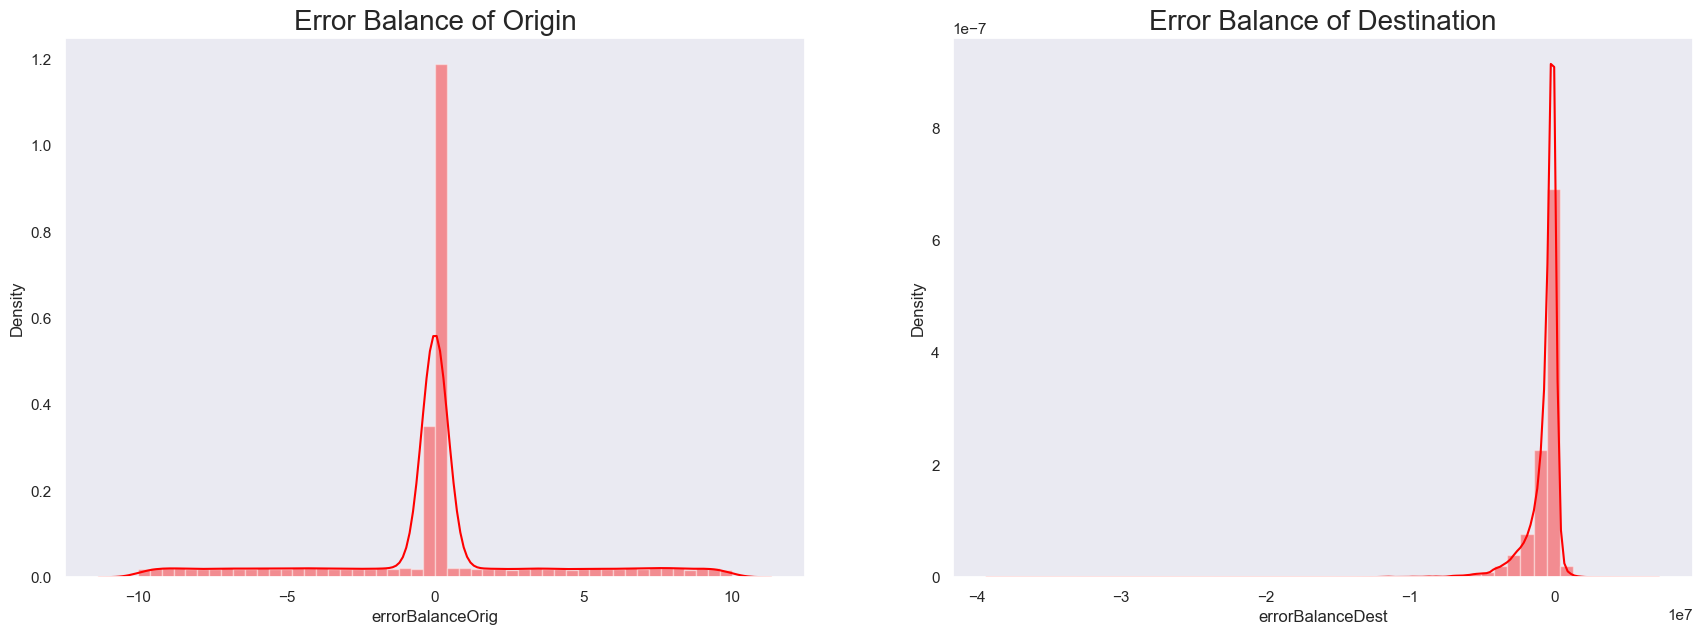

In [95]:
# visualizing the distribution of errorbalance

# setting the size of the plot
plt.rcParams['figure.figsize'] = (21, 7)

plt.subplot(121)
sns.distplot(X['errorBalanceOrig'], color = 'red')
plt.title('Error Balance of Origin', fontsize = 20)

plt.subplot(122)
sns.distplot(X['errorBalanceDest'], color = 'red')
plt.title('Error Balance of Destination', fontsize = 20)

plt.show()

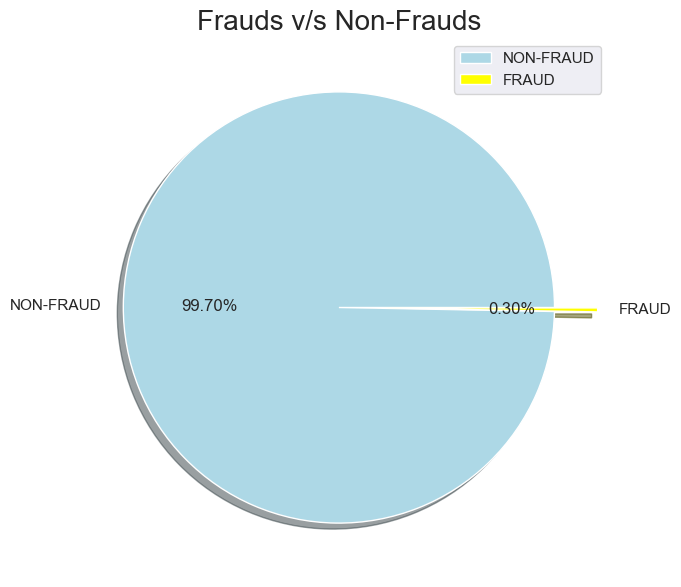

In [96]:
# checking the no. of frauds in the dataset

X['isFraud'].value_counts()

# plotting a pie chart to represent the fraction of the frauds 

size = [2762196, 8213]
labels = ['NON-FRAUD', 'FRAUD']
colors = ['lightblue', 'yellow']
explode = [0, 0.2]

plt.pie(size, labels = labels, colors = colors, explode = explode, shadow  = True, autopct = '%.2f%%')
plt.title('Frauds v/s Non-Frauds', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [97]:
X['isFraud'].value_counts()

isFraud
0    23574
1    15741
Name: count, dtype: int64

In [98]:
# making our independent set

Y = X['isFraud']

# removing the dependent set
X = X.drop(['isFraud'], axis = 1)

# getting the shapes of x and y
print("Shape of x: ", X.shape)
print("Shape of y: ", Y.shape)


Shape of x:  (39315, 9)
Shape of y:  (39315,)


In [99]:
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,errorBalanceOrig,errorBalanceDest
2,1,0,5827.77,21806.90,15979.13,0.0,0.00,0.00,5827.77
3,1,1,2703.90,45156.67,42457.62,21182.0,0.00,4.85,23885.90
15,1,1,9344.45,58072.61,48728.17,5083.0,51513.44,0.01,-37085.99
19,1,0,2010.92,2756.07,747.21,22425.0,0.00,2.06,24435.92
24,1,0,2032.46,5549.60,3523.57,6267.0,2719172.89,6.43,-2710873.43


In [100]:
!pip install --upgrade scikit-learn imbalanced-learn


**OVER-SAMPLING**

In [101]:
from imblearn.over_sampling import SMOTE

# Assuming X and Y are your feature and target dataframes/arrays
smote = SMOTE()
x_resample, y_resample = smote.fit_resample(X, Y.values.ravel())

# Getting the shapes of x and y after resampling
print("Shape of x: ", x_resample.shape)
print("Shape of y: ", y_resample.shape)


Shape of x:  (47148, 9)
Shape of y:  (47148,)


In [102]:
# splitting the dataset into train and tests

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

# checking the new shapes
print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (37718, 9)
Shape of x_test:  (9430, 9)
Shape of y_train:  (37718,)
Shape of y_test:  (9430,)


In [103]:
# performing standard scaling on the data for better fit

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [104]:
!pip install xgboost


**Modelling using Xg-Boost Model**

In [105]:
# Using XGBOOST


import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import average_precision_score

model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# score of the model
auprc = average_precision_score(y_test, y_pred)
print("The Area under Precision Recall Curve Score is", auprc)

The Area under Precision Recall Curve Score is 0.9991545176477826


In [106]:
# looking at the confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[4707    0]
 [   8 4715]]


In [107]:
dataTransfer.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,5827.77,C1305486145,21806.90,15979.13,C553264065,0.00,0.00,0,0
19,1,TRANSFER,2010.92,C1670993182,2756.07,747.21,C1100439041,22425.00,0.00,1,0
24,1,TRANSFER,2032.46,C1984094095,5549.60,3523.57,C932583850,6267.00,2719172.89,1,0
58,1,TRANSFER,6678.35,C1976401987,27790.06,21113.89,C1937962514,517.00,8383.29,1,0
78,1,TRANSFER,6227.72,C283039401,79164.12,72936.40,C1330106945,57901.66,24044.18,0,0


In [108]:
x.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,8454.40,C1231006815,32107.88,23653.48,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1742.91,C1666544295,70278.19,68535.28,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,5827.77,C1305486145,21806.90,15979.13,C553264065,0.0,0.0,0,0
4,1,PAYMENT,2666.88,C2048537720,76644.30,73977.41,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,85.69,C90045638,65428.65,65342.95,M573487274,0.0,0.0,0,0


In [109]:
userinput=[[1,0,181.00,181.0,0.0,0.0,0.00,0,0.00]]

In [110]:
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,errorBalanceOrig,errorBalanceDest
2,1,0,5827.77,21806.90,15979.13,0.0,0.00,0.00,5827.77
3,1,1,2703.90,45156.67,42457.62,21182.0,0.00,4.85,23885.90
15,1,1,9344.45,58072.61,48728.17,5083.0,51513.44,0.01,-37085.99
19,1,0,2010.92,2756.07,747.21,22425.0,0.00,2.06,24435.92
24,1,0,2032.46,5549.60,3523.57,6267.0,2719172.89,6.43,-2710873.43


In [113]:
userinput=[[1,1,2703.90,45156.67,42457.62,21182.0,0.00,4.85,23885.90]]

In [114]:
# Assuming x_test is your input data
predictions = model.predict(userinput)
predictions[0]


1